# XGBoost - eXtreme Gradient Boosting
- XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
- R, Python, Hadoop, Scala, Julia ile kullanılabilir.
- Öleçklenebilirdir.
- Hızlıdır.
- Tahmin başarısı yüksektir.
- Birçok Kaggle yarışmasında başarısı kanıtlanmıştır.

In [14]:
!pip install xgboost

**Gerekli Kütüphaneler** 

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [21]:
# Uyarı Mesajları ile Karşılaşmamak için bu kütüphaneyi kullanıyoruz.
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)

# Veri Seti Hikayesi ve Problemi: Şeker Hastalığı Tahmini

In [22]:
df = pd.read_csv("./diabetes.csv")
# bu csv dosyasının içerisinde eksik gözlemleri(NA) çıkardık.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# XGBoost ve Tahmin İşlemleri

In [23]:
y= df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42)

**Model**

In [26]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[23:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        c:\users\halil\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new code,
        we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective

**Tahmin**

In [28]:
y_pred = xgb_model.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.7359307359307359

# Model Tuning (Model Doğrulama)
-  Modelin başarısını değerlendirmek için izlenecek yol Doğruluk oranına (accuracy_score) bakılarak yapılacak. 
- **accuracy_score**' u ne kadar büyük olursa sınıflandırma da o kadar başarılı olduğu anlamına gelir.
- Hiper parametrelerin optimum değerlerine ulaşmak içinde Cross-Validation yöntemini kullanmış olacağız.
- Yani modelleri Train Setiyle eğitirken Cross-Validation yönetemini kullanıp, dışarı bıraktığımız Test Setini ise performansımızı test etmek için kullanacaz.

In [30]:
xgb_params = {"n_estimators": [100,500,1000],
              "subsample": [0.6, 0.8, 2],
              "max_depth": [3,5,7],
              "learning_rate": [0.1, 0.001,0.01]}

In [31]:
xgb_cv_model = GridSearchCV(xgb_model,xgb_params, cv=10,
                            n_jobs= -1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.7min finished
C:\Users\halil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:44:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

**Final Modeli**

In [33]:
xgb_tuned = XGBClassifier( learning_rate= 0.001,
                           max_depth= 7,
                           n_estimators= 500, 
                           subsample= 0.6).fit(X_train, y_train)

C:\Users\halil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:45:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [34]:
y_tuned_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_tuned_pred)

0.7575757575757576

## Değişken Önem Düzeyleri

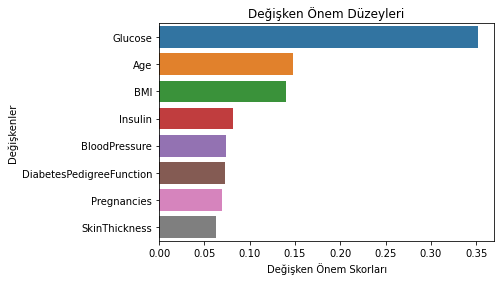

In [35]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.savefig("Değişken Önem Düzeyleri")
plt.show()